# Primewords-Set1 - 数据分析报告

In [ ]:
!pip install pypinyin

In [ ]:
import os
import glob
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import IPython.display as ipd
from pypinyin import lazy_pinyin, Style

## 挂载 Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 解压数据

数据来自：[Primewords-Set1 - 数据下载](https://github.com/wu-jingtao/training-data/blob/master/speech_recognition/chinese/Primewords-Set1/notebooks/Primewords-Set1-下载数据.ipynb)

In [ ]:
!tar -zxvf /content/drive/Shareddrives/TeamDrive_top_edu/原始数据/Primewords-Set1/primewords_md_2018_set1.tar.gz > unzip_log.txt

## 读取文件信息数据

In [ ]:
file_list = pd.read_json('/content/primewords_md_2018_set1/set1_transcript.json')

## 工具方法

In [ ]:
path_list = dict()

for path in glob.glob('/content/primewords_md_2018_set1/**/*.wav', recursive=True):
  name = os.path.splitext(os.path.split(path)[1])[0]
  path_list[name] = path

查看音频

In [ ]:
def show_audio(id):
  name = os.path.splitext(file_list.loc[id]['file'])[0]
  path = path_list[name]
  audio, sr = librosa.load(path, sr=None)
  text = file_list.loc[id]['text']
  print(text)
  ipd.display(ipd.Audio(audio, rate=sr))

## 统计音频时长

In [ ]:
audio_duration = pd.DataFrame(file_list['length'])
audio_duration.rename(columns={'length': 'duration'}, inplace=True)
audio_duration = audio_duration.sort_values('duration', ascending=False)

总时长（小时）

In [ ]:
audio_duration.sum() / 3600

duration    100.002228
dtype: float64

总体特征

In [ ]:
audio_duration.describe()

,duration
count,50902.000000
mean,7.072571
std,2.037949
min,1.320000
25%,5.640000
50%,6.840000
75%,8.240000
max,20.040000


时长分布

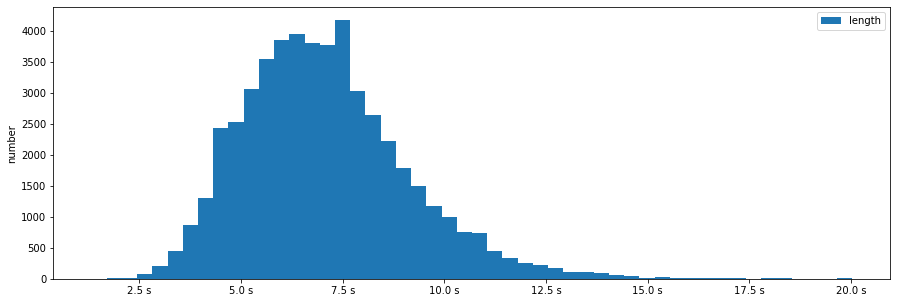

In [ ]:
audio_duration.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))

最长的 5 条音频

In [ ]:
audio_duration.head()

,duration
44222,20.04
47392,19.92
20824,19.92
9427,19.92
8766,19.80


最短的 5 条音频

In [ ]:
audio_duration.tail().iloc[::-1]

,duration
37863,1.32
14399,1.32
32346,1.44
21959,1.76
7784,1.80


## 统计句子长度

In [ ]:
sentences_length = file_list['text'].map(lambda x: len(x.replace(' ', '')))
sentences_length = pd.DataFrame(sentences_length)
sentences_length.rename(columns={'text': 'length'}, inplace=True)
sentences_length = sentences_length.sort_values('length', ascending=False)

总字数

In [ ]:
sentences_length.sum()

length    1052203
dtype: int64

总体特征

In [ ]:
sentences_length.describe()

,length
count,50902.000000
mean,20.671152
std,4.177179
min,1.000000
25%,18.000000
50%,20.000000
75%,23.000000
max,35.000000


长度分布

Text(0, 0.5, 'number')

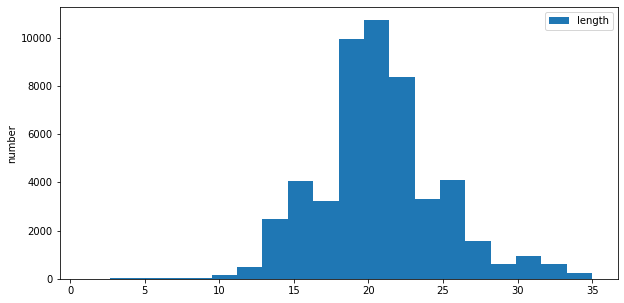

In [ ]:
sentences_length.plot.hist(bins=20, figsize=(10, 5))
plt.ylabel('number')

最长的 5 条句子

In [ ]:
sentences_length.head()

,length
31750,35
20309,35
34280,35
25335,35
3119,35


最短的 5 条句子

In [ ]:
sentences_length.tail().iloc[::-1]

,length
14399,1
37863,2
37078,3
46263,3
15786,3


## 统计语速变化

In [ ]:
speed_change = audio_duration['duration'] / sentences_length['length'] * 1000
speed_change = pd.DataFrame(speed_change, columns=['speed (ms)'])
speed_change = speed_change.sort_values('speed (ms)', ascending=False)

总体特征

In [ ]:
speed_change.describe()

,speed (ms)
count,50902.000000
mean,345.545876
std,87.517012
min,147.692308
25%,283.478261
50%,331.225000
75%,392.000000
max,1320.000000


语速分布

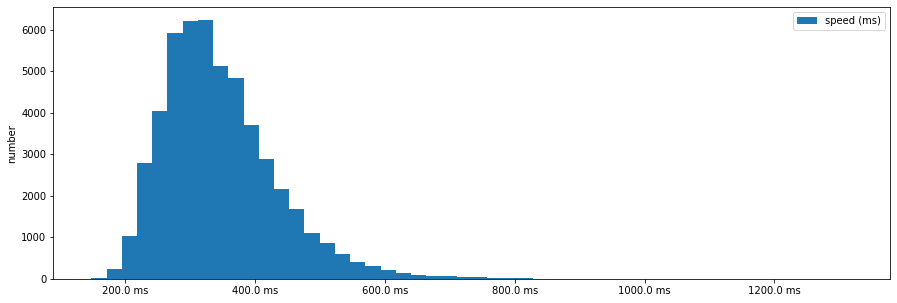

In [ ]:
speed_change.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f ms'))

语速最快的 5 条音频

In [ ]:
speed_change.tail().iloc[::-1]

,speed (ms)
42385,147.692308
41688,154.285714
40858,157.500000
14873,160.000000
41276,161.250000


语速最慢的 5 条音频

In [ ]:
speed_change.head()

,speed (ms)
14399,1320.000000
40006,1114.285714
19530,1072.000000
46263,1060.000000
26026,1029.473684


## 统计发音覆盖范围

### 5 种声调的分布情况

In [ ]:
pinyin_distribution = dict()

for words in file_list['text']:
  pinyins = lazy_pinyin(words, Style.TONE3, neutral_tone_with_five=True)
  for i in pinyins:
    if i in pinyin_distribution:
      pinyin_distribution[i] +=1 
    else:
      pinyin_distribution[i] = 1

pinyin_distribution.pop(' ')
pinyin_distribution = pd.DataFrame.from_dict(pinyin_distribution, orient='index', columns=['number'])
pinyin_distribution = pinyin_distribution.sort_values('number', ascending=False)

总体特征

In [ ]:
# 从结果来看，这个数据集并没有覆盖到所有的发音，一个使用4种声调的拼音表有1644种发音，而这里使用5种声调却只有1222种
pinyin_distribution.describe()

,number
count,1222.000000
mean,861.049918
std,1830.654031
min,1.000000
25%,47.250000
50%,243.500000
75%,894.750000
max,30067.000000


发音分布

Text(0, 0.5, 'number')

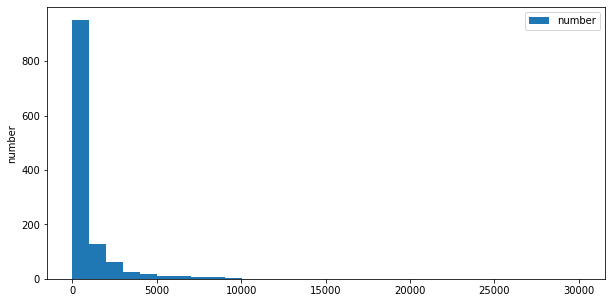

In [ ]:
pinyin_distribution.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [ ]:
pinyin_distribution.head()

,number
de5,30067
shi2,19488
shi4,18969
yi1,16890
er4,9977


### 去除声调后的分布情况

In [ ]:
pinyin_distribution_without_intonation = dict()

for words in file_list['text']:
  pinyins = lazy_pinyin(words)
  for i in pinyins:
    if i in pinyin_distribution_without_intonation:
      pinyin_distribution_without_intonation[i] +=1 
    else:
      pinyin_distribution_without_intonation[i] = 1

pinyin_distribution_without_intonation.pop(' ')
pinyin_distribution_without_intonation = pd.DataFrame.from_dict(pinyin_distribution_without_intonation, orient='index', columns=['number'])
pinyin_distribution_without_intonation = pinyin_distribution_without_intonation.sort_values('number', ascending=False)

总体特征

In [ ]:
# 从结果来看，不带声调的发音覆盖的比较好，不带声调的拼音表有411种发音，这里有402种
pinyin_distribution_without_intonation.describe()

,number
count,402.000000
mean,2617.420398
std,4225.785600
min,3.000000
25%,351.500000
50%,1251.500000
75%,3185.500000
max,44198.000000


发音分布

Text(0, 0.5, 'number')

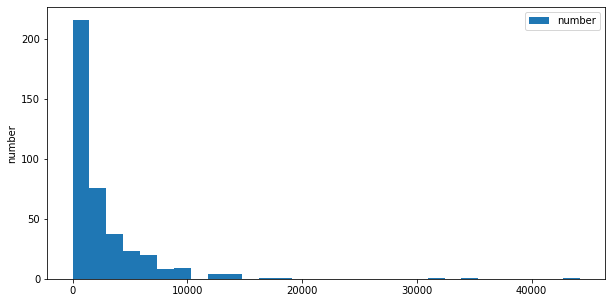

In [ ]:
pinyin_distribution_without_intonation.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [ ]:
pinyin_distribution_without_intonation.head()

,number
shi,44198
yi,34313
de,32403
zhi,18927
ji,17296
